<a href="https://colab.research.google.com/github/hws2002/Deep_Learning_with_Keras/blob/main/Chapter5/Chapter5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

경사 하강법의 핵심 파라미터 튜닝하기

In [2]:
from keras.datasets import mnist
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
import keras
from keras import layers

model = keras.Sequential([
      layers.Dense(512, activation = "relu"),
      layers.Dense(10, activation = "softmax")
    ])
model.compile(
    optimizer = keras.optimizers.RMSprop(.25),
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)
model.fit(train_images,
          train_labels,
          epochs = 20,
          batch_size = 256,
          validation_split = 0.2)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.5609 - loss: 1316.6921 - val_accuracy: 0.3827 - val_loss: 2.4243
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.3346 - loss: 2.6157 - val_accuracy: 0.3638 - val_loss: 1.6735
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3395 - loss: 2.2857 - val_accuracy: 0.3262 - val_loss: 1.8651
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.3087 - loss: 2.1801 - val_accuracy: 0.3780 - val_loss: 1.7372
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3359 - loss: 2.2690 - val_accuracy: 0.3941 - val_loss: 1.6839
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3436 - loss: 2.0655 - val_accuracy: 0.3862 - val_loss: 1.6676
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3802 - loss: 2.1197 - val_accuracy: 0.3962 - val_loss: 2.0351
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.3643 - loss: 2.2103 - val_a

# 모델 용량 늘리기

간단한 로지스틱 회귀 모델을 생각해보자

In [9]:

model = keras.Sequential([
    layers.Dense(10, activation = "softmax")
])

model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

history_small_model = model.fit(
    train_images, train_labels,
    epochs = 20,
    batch_size = 128,
    validation_split = 0.2
)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7403 - loss: 1.0463 - val_accuracy: 0.9035 - val_loss: 0.3594
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9021 - loss: 0.3584 - val_accuracy: 0.9143 - val_loss: 0.3108
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9100 - loss: 0.3211 - val_accuracy: 0.9203 - val_loss: 0.2932
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9157 - loss: 0.3018 - val_accuracy: 0.9197 - val_loss: 0.2841
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9195 - loss: 0.2903 - val_accuracy: 0.9224 - val_loss: 0.2790
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9200 - loss: 0.2835 - val_accuracy: 0.9244 - val_loss: 0.2748
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9223 - loss: 0.2769 - val_accuracy: 0.9266 - val_loss: 0.2717
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9226 - loss: 0.2803 - val_accuracy: 0.

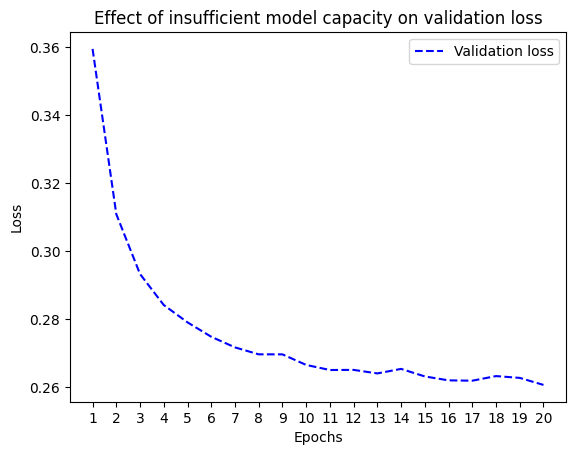

In [19]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history['val_loss']
epochs = range(1, len(val_loss) + 1)
plt.plot(epochs, val_loss, 'b--', label = 'Validation loss')
plt.xticks(epochs)

plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

검증 손실이 정점에 도달해서 역전되지 않고 멈추어 있거나 매우 느리게 좋아지는 것 같음.  검증 손실이 0.26에 도달한 후 그 지점에서 정체되어 있음. 모델을 훈련했지만 훈련 데이터에서 여러 번 반복한 후에도 과대적합되지 못했다는 뜻임.  

하지만 항상 과대적합이 가능하다는것을 기억하자.  훈련 손실이 줄어들지 않는 문제와 마찬가지로 이런 문제는 항상 해결할 수 있음. 과대적합할 수 없는 것처럼 보인다면 모델의 표현능력(representational power)이 부족한 것임. 용량이 더 큰 모델이 필요함. 즉, 층을 추가하거나, 층 크기를 늘리거나, 현재 문제에 더 적합한 종류의 층(구조에 대해 더 나은 가정)을 사용할 수 있음.  

96개의 유닛을 가진 2개의 중간층으로 구성되어 용량이 더 큰 모델을 훈련해 보자.


In [16]:
model = keras.Sequential([
    layers.Dense(96, activation = 'relu'),
    layers.Dense(96, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])

model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

history_large_model = model.fit(
    train_images,
    train_labels,
    epochs = 20,
    batch_size = 128,
    validation_split = 0.2
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8293 - loss: 0.6174 - val_accuracy: 0.9481 - val_loss: 0.1861
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9490 - loss: 0.1747 - val_accuracy: 0.9607 - val_loss: 0.1391
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9665 - loss: 0.1149 - val_accuracy: 0.9674 - val_loss: 0.1137
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9743 - loss: 0.0839 - val_accuracy: 0.9691 - val_loss: 0.1057
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9799 - loss: 0.0666 - val_accuracy: 0.9715 - val_loss: 0.0986
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9839 - loss: 0.0535 - val_accuracy: 0.9727 - val_loss: 0.0952
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9872 - loss: 0.0416 - val_accuracy: 0.9725 - val_loss: 0.1066
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9886 - loss: 0.0385 - val_accuracy: 0.

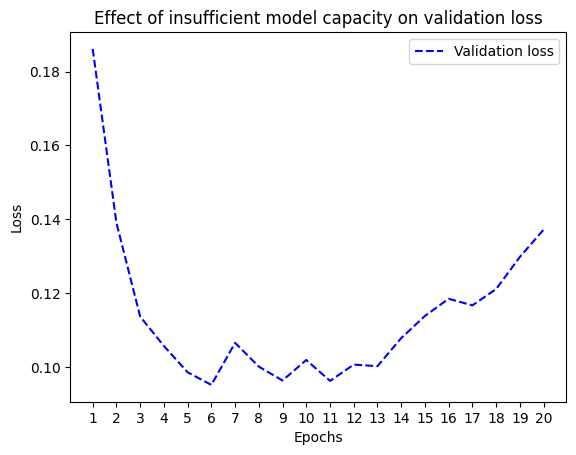

In [18]:
val_loss = history_large_model.history['val_loss']
epochs = range(1, len(val_loss) + 1)
plt.plot(epochs, val_loss, 'b--', label = 'Validation loss')
plt.xticks(epochs)

plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

8번쨰 에포크 이후에 과대적합되기 시작함